In [249]:
using DataFrames, Impute, CSV,Statistics,VegaLite,Dates,TimeSeries,Measures,Plots,Clustering,NumPyArrays, PyCall,MLJ,MLJModels 


In [250]:
# gr()
Plots.pyplot()
# plotlyjs()


Plots.PyPlotBackend()

In [251]:
data = CSV.read("/home/useeffect/Desktop/Kaggle/india.csv",DataFrame)
println(typeof(data))
println(describe(data))


DataFrame
14×7 DataFrame
 Row │ variable  mean       min    median   max    nmissing  eltype   
     │ Symbol    Float64    Real   Float64  Real   Int64     DataType 
─────┼────────────────────────────────────────────────────────────────
   1 │ Column1     58.0         0    58.0     116         0  Int64
   2 │ YEAR      1959.0      1901  1959.0    2017         0  Int64
   3 │ JAN         18.4232  17.25    18.35  20.92         0  Float64
   4 │ FEB         20.1379  17.79    19.99  23.58         0  Float64
   5 │ MAR         23.4342  21.78    23.33  26.61         0  Float64
   6 │ APR         26.5141  24.84    26.54  29.56         0  Float64
   7 │ MAY         28.3864  26.97    28.34  30.78         0  Float64
   8 │ JUN         28.3009  27.33    28.25  29.88         0  Float64
   9 │ JUL         27.3692  26.48    27.34  28.47         0  Float64
  10 │ AUG         26.9401  26.21    26.9   28.17         0  Float64
  11 │ SEP         26.3426  25.47    26.31  28.11         0  Float64
  12 │ 

In [252]:
show(data,allcols=true)

117×14 DataFrame
 Row │ Column1  YEAR   JAN      FEB      MAR      APR      MAY      JUN      JUL      AUG      SEP      OCT      NOV      DEC     
     │ Int64    Int64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │       0   1901    17.99    19.43    23.49    26.41    28.28    28.6     27.49    26.98    26.26    25.08    21.73    18.95
   2 │       1   1902    19.0     20.39    24.1     26.54    28.68    28.44    27.29    27.05    25.95    24.37    21.33    18.78
   3 │       2   1903    18.32    19.79    22.46    26.03    27.93    28.41    28.04    26.63    26.34    24.57    20.96    18.29
   4 │       3   1904    17.77    19.39    22.95    26.73    27.83    27.85    26.84    26.73    25.84    24.36    21.07    18.84
   5 │       4   1905    17.4     17.79    21.78    24.84    28.32    

In [253]:
summary(data)

"117×14 DataFrame"

In [254]:
names(data)

14-element Vector{String}:
 "Column1"
 "YEAR"
 "JAN"
 "FEB"
 "MAR"
 "APR"
 "MAY"
 "JUN"
 "JUL"
 "AUG"
 "SEP"
 "OCT"
 "NOV"
 "DEC"

In [255]:
data2 = stack(data,3:14)

,Column1,YEAR,variable,value
,Int64,Int64,String,Float64
1,0,1901,JAN,17.99
2,1,1902,JAN,19.0
3,2,1903,JAN,18.32
4,3,1904,JAN,17.77
5,4,1905,JAN,17.4
6,5,1906,JAN,17.5
7,6,1907,JAN,19.27
8,7,1908,JAN,18.35
9,8,1909,JAN,17.79


In [256]:
describe(data2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,58.0,0,58.0,116,0,Int64
2,YEAR,1959.0,1901,1959.0,2017,0,Int64
3,variable,,APR,,SEP,0,String
4,value,24.2942,17.25,25.57,30.78,0,Float64


In [257]:
select!(data2,Not(:Column1))

,YEAR,variable,value
,Int64,String,Float64
1,1901,JAN,17.99
2,1902,JAN,19.0
3,1903,JAN,18.32
4,1904,JAN,17.77
5,1905,JAN,17.4
6,1906,JAN,17.5
7,1907,JAN,19.27
8,1908,JAN,18.35
9,1909,JAN,17.79


In [258]:
newDate =string.("01","-",data2.variable,"-",data2.YEAR)

1404-element Vector{String}:
 "01-JAN-1901"
 "01-JAN-1902"
 "01-JAN-1903"
 "01-JAN-1904"
 "01-JAN-1905"
 "01-JAN-1906"
 "01-JAN-1907"
 "01-JAN-1908"
 "01-JAN-1909"
 "01-JAN-1910"
 "01-JAN-1911"
 "01-JAN-1912"
 "01-JAN-1913"
 ⋮
 "01-DEC-2006"
 "01-DEC-2007"
 "01-DEC-2008"
 "01-DEC-2009"
 "01-DEC-2010"
 "01-DEC-2011"
 "01-DEC-2012"
 "01-DEC-2013"
 "01-DEC-2014"
 "01-DEC-2015"
 "01-DEC-2016"
 "01-DEC-2017"

In [259]:
data2.newDate = newDate

1404-element Vector{String}:
 "01-JAN-1901"
 "01-JAN-1902"
 "01-JAN-1903"
 "01-JAN-1904"
 "01-JAN-1905"
 "01-JAN-1906"
 "01-JAN-1907"
 "01-JAN-1908"
 "01-JAN-1909"
 "01-JAN-1910"
 "01-JAN-1911"
 "01-JAN-1912"
 "01-JAN-1913"
 ⋮
 "01-DEC-2006"
 "01-DEC-2007"
 "01-DEC-2008"
 "01-DEC-2009"
 "01-DEC-2010"
 "01-DEC-2011"
 "01-DEC-2012"
 "01-DEC-2013"
 "01-DEC-2014"
 "01-DEC-2015"
 "01-DEC-2016"
 "01-DEC-2017"

In [260]:
describe(data2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,YEAR,1959.0,1901,1959.0,2017,0,Int64
2,variable,,APR,,SEP,0,String
3,value,24.2942,17.25,25.57,30.78,0,Float64
4,newDate,,01-APR-1901,,01-SEP-2017,0,String


In [261]:
data2.newDate = Date.(data2.newDate,"dd-u-yyyy")

1404-element Vector{Date}:
 1901-01-01
 1902-01-01
 1903-01-01
 1904-01-01
 1905-01-01
 1906-01-01
 1907-01-01
 1908-01-01
 1909-01-01
 1910-01-01
 1911-01-01
 1912-01-01
 1913-01-01
 ⋮
 2006-12-01
 2007-12-01
 2008-12-01
 2009-12-01
 2010-12-01
 2011-12-01
 2012-12-01
 2013-12-01
 2014-12-01
 2015-12-01
 2016-12-01
 2017-12-01

In [262]:
describe(data2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,YEAR,1959.0,1901,1959.0,2017,0,Int64
2,variable,,APR,,SEP,0,String
3,value,24.2942,17.25,25.57,30.78,0,Float64
4,newDate,,1901-01-01,,2017-12-01,0,Date


In [263]:
sort!(data2, (:newDate))

,YEAR,variable,value,newDate
,Int64,String,Float64,Date
1,1901,JAN,17.99,1901-01-01
2,1901,FEB,19.43,1901-02-01
3,1901,MAR,23.49,1901-03-01
4,1901,APR,26.41,1901-04-01
5,1901,MAY,28.28,1901-05-01
6,1901,JUN,28.6,1901-06-01
7,1901,JUL,27.49,1901-07-01
8,1901,AUG,26.98,1901-08-01
9,1901,SEP,26.26,1901-09-01


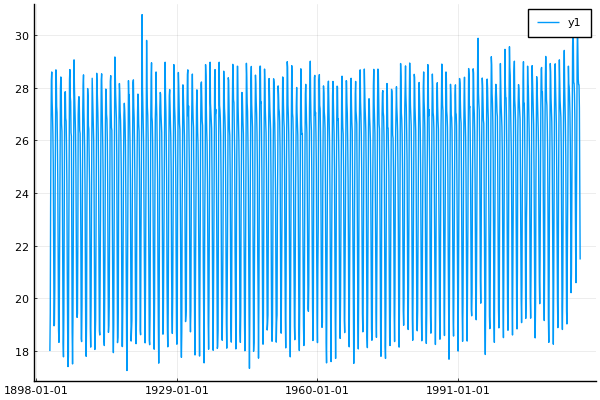

In [264]:
# ticks = [data2.newDate[i] for i in 1:350:length(data2.newDate)]
plot(data2.newDate,data2.value,xrotation=90,
    bottom_margin=1mm,
    left_margin=1mm)

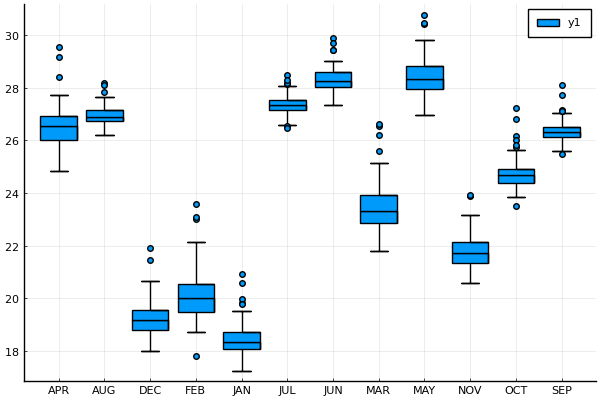

In [265]:
boxplot(data2.variable,data2.value)


In [266]:
# data2.value = NumPyArray(data2.value)
# hcat(data2.value)
# println(typeof(data2.value))

# features = collect(data2.value)
# println(typeof(hcat(features)))

In [267]:
# histogram!(data2.variable,data2.value,nbins=4,color=:red)

In [268]:
# data2 = stack(data,1:1)



In [269]:
# describe(data2)

In [270]:
schema(data2)

┌──────────┬─────────┬────────────────┐
│ _.names  │ _.types │ _.scitypes     │
├──────────┼─────────┼────────────────┤
│ YEAR     │ Int64   │ Count          │
│ variable │ String  │ Textual        │
│ value    │ Float64 │ Continuous     │
│ newDate  │ Date    │ ScientificDate │
└──────────┴─────────┴────────────────┘
_.nrows = 1404


In [271]:
y,X = unpack(data2, ==(:value),name->true;rng=123)
scitype(y)


AbstractVector{Continuous} (alias for AbstractArray{Continuous, 1})

In [274]:
meta = models()

168-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :deep_properties, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = ARDRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BaggingRegressor, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = M

In [275]:
meta=meta[20]

Convert all `Finite` (categorical) and `Count` features (columns) of a table to `Continuous` and drop all  remaining non-`Continuous` features. 
→ based on [MLJModels](https://github.com/alan-turing-institute/MLJModels.jl).
→ do `@load ContinuousEncoder pkg="MLJModels"` to use the model.
→ do `?ContinuousEncoder` for documentation.
(name = "ContinuousEncoder",
 package_name = "MLJModels",
 is_supervised = false,
 deep_properties = (),
 docstring = "Convert all `Finite` (categorical) and `Count` features (columns) of a table to `Continuous` and drop all  remaining non-`Continuous` features. \n→ based on [MLJModels](https://github.com/alan-turing-institute/MLJModels.jl).\n→ do `@load ContinuousEncoder pkg=\"MLJModels\"` to use the model.\n→ do `?ContinuousEncoder` for documentation.",
 hyperparameter_ranges = (nothing, nothing),
 hyperparameter_types = ("Bool", "Bool"),
 hyperparameters = (:drop_last, :one_hot_ordered_factors),
 implemented_methods = [:fit, :fitted_params, :transform],
 